<a href="https://colab.research.google.com/github/hyunjaec/MScA_Deep_Learning_Project/blob/main/zoning_image_processing_bounding_box_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

austin_df = pd.read_csv("/content/drive/My Drive/data/data/austin.csv")

In [4]:
austin_df.head()

,Unnamed: 0,image_name,zoning_id,zoning_zty
0,0,data/austin_0.jpg,229791,PUD
1,1,data/austin_1.jpg,229791,PUD
2,2,data/austin_2.jpg,400523442,I-RR
3,3,data/austin_3.jpg,229791,PUD
4,4,data/austin_4.jpg,229791,PUD


In [5]:
austin_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [7]:
import os 

images = [i for i in os.listdir() if i.endswith('jpg')]
len(images)

3667

In [8]:
residential = ['LA',
            'RR',
            'SF-1',
            'SF-2',
            'SF-3',
            'SF-4A',
            'SF-4-A,'
            'SF-4B',
            'SF-5',
            'SF-6',
            'MF-1',
            'MF-2',
            'MF-3',
            'MF-4',
            'MF-5',
            'MF-6',
            'MF-CO',
            'MH']

commercial = ['NO',
            'LO',
            'GO',
            'CR',
            'LR',
            'GR',
            'L',
            'CBD',
            'DMU',
            'W/LO',
            'CS',
            'CS-1',
            'CH']

industrial = ['IP', 'LI', 'MI', 'R&D']

special = ['DR', 'AV', 'AG', 'P', 'PUD', 'TN', 'ERC', 'UNZ']

In [10]:
import numpy as np

#loop through list of zone codes, map specific zone codes to R, C, I, or S
austin_df.loc[:, 'zone'] = np.nan

for i in residential:
    austin_df.loc[:, 'zone'] = np.where(austin_df.loc[:, 'zoning_zty'].str.contains(i) == True, 
                                     'R', austin_df.loc[:,'zone'])
for i in industrial:
    austin_df.loc[:, 'zone'] = np.where(((austin_df.loc[:, 'zoning_zty'].str.contains(i) == True) & (austin_df.loc[:, 'zone'] != 'R')), 
                                     'I', austin_df.loc[:,'zone'])
for i in commercial:
    austin_df.loc[:, 'zone'] = np.where((austin_df.loc[:, 'zoning_zty'].str.contains(i) == True) & \
                                     (austin_df.loc[:, 'zone'] != 'R') & (austin_df.loc[:, 'zone'] != 'I'), 
                                     'C', austin_df.loc[:,'zone'])
for i in special:
    austin_df.loc[:, 'zone'] = np.where((austin_df.loc[:, 'zoning_zty'].str.contains(i) == True) & \
                                     (austin_df.loc[:, 'zone'] != 'I') & (austin_df.loc[:, 'zone'] != 'R') &\
                                     (austin_df.loc[:, 'zone'] != 'C'), 
                                     'S', austin_df.loc[:,'zone'])

In [11]:
#manually set this one
austin_df.loc[303, 'zone'] = 'R'

In [12]:
austin_df.head()

,image_name,zoning_id,zoning_zty,zone
0,data/austin_0.jpg,229791,PUD,S
1,data/austin_1.jpg,229791,PUD,S
2,data/austin_2.jpg,400523442,I-RR,R
3,data/austin_3.jpg,229791,PUD,S
4,data/austin_4.jpg,229791,PUD,S


In [13]:
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import matplotlib.pyplot as plt

dim = (100,100)
cropped_images = []

for i in tqdm(images):
  img = cv2.imread(i)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
  dst = cv2.Canny(gray, 0, 150)
  blured = cv2.blur(dst, (5,5), 0)    
  MIN_CONTOUR_AREA=200
  img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
  Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  for contour in Contours:
    if cv2.contourArea(contour) > MIN_CONTOUR_AREA:
        [X, Y, W, H] = cv2.boundingRect(contour)
        box=cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)
  cropped_image = img[Y:Y+H, X:X+W]
  cropped_image = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)

  #print([X,Y,W,H])
  #plt.imshow(cropped_image)
  #cv2.imwrite('contour1.png', cropped_image)
  cropped_images.append(cropped_image)

# image = cv2.imread(images[0])
# original = image.copy()
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# ROI_number = 0
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     x,y,w,h = cv2.boundingRect(c)
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
#     ROI = original[y:y+h, x:x+w]
#     cv2.imwrite('Image_{}.png'.format(ROI_number), ROI)
#     ROI_number += 1

# cv2_imshow(image)
# cv2_imshow(thresh)
# cv2.waitKey()

100%|██████████| 3667/3667 [07:30<00:00,  8.14it/s]


In [14]:
import numpy as np

img_array = np.array(cropped_images) 
img_array.shape

(3667, 100, 100, 3)

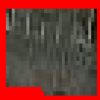

In [15]:
cv2_imshow(img_array[53])

In [16]:
austin_df

,image_name,zoning_id,zoning_zty,zone
0,data/austin_0.jpg,229791,PUD,S
1,data/austin_1.jpg,229791,PUD,S
2,data/austin_2.jpg,400523442,I-RR,R
3,data/austin_3.jpg,229791,PUD,S
4,data/austin_4.jpg,229791,PUD,S
...,...,...,...,...
3662,data/austin_3662.jpg,136346,PUD,S
3663,data/austin_3663.jpg,136346,PUD,S
3664,data/austin_3664.jpg,136346,PUD,S
3665,data/austin_3665.jpg,136346,PUD,S


In [17]:
from sklearn.model_selection import train_test_split

img_df2 = np.array(cropped_images) 
zone_class = np.array(austin_df['zone']) 
zone_class = pd.get_dummies(zone_class)
#split labels and images for train&test
X_train, X_test, y_train, y_test = train_test_split(img_df2, zone_class, test_size=.3)
input_shape = (200, 200, 3)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     validation_split=0.2
    
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

datagen.fit(X_train)

# **CNN Test**

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential, Model

In [54]:
input_shape = (dim[1], dim[0], 3)
input_shape

(100, 100, 3)

In [55]:
def base_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation="relu"))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D((2,2)))
#     model.add(BatchNormalization())
#     model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Flatten())
    model.add(Dense(32, activation="relu"))
#     model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(4, activation="softmax"))
    return model
model = base_model()

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 dropout_9 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 50, 50, 64)        51264     
                                                                 
 conv2d_21 (Conv2D)          (None, 50, 50, 64)        102464    
                                                      

In [58]:
#model.compile(, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["categorical_accuracy"])



In [59]:
history = model.fit(datagen.flow(X_train, y_train, subset='training'), 
                    validation_data=datagen.flow(X_train, y_train, subset='validation'),
                    epochs=100)

Epoch 1/100
65/65 [==============================] - 202s 3s/step - loss: 3.5580 - categorical_accuracy: 0.4496 - val_loss: 1.1601 - val_categorical_accuracy: 0.4854
Epoch 2/100
65/65 [==============================] - 202s 3s/step - loss: 1.1925 - categorical_accuracy: 0.4676 - val_loss: 1.1513 - val_categorical_accuracy: 0.4854
Epoch 3/100
65/65 [==============================] - 202s 3s/step - loss: 1.1763 - categorical_accuracy: 0.4686 - val_loss: 1.1523 - val_categorical_accuracy: 0.4854
Epoch 4/100
65/65 [==============================] - 200s 3s/step - loss: 1.1732 - categorical_accuracy: 0.4686 - val_loss: 1.1531 - val_categorical_accuracy: 0.4854
Epoch 5/100
65/65 [==============================] - 201s 3s/step - loss: 1.1720 - categorical_accuracy: 0.4686 - val_loss: 1.1529 - val_categorical_accuracy: 0.4854
Epoch 6/100
65/65 [==============================] - 200s 3s/step - loss: 1.1702 - categorical_accuracy: 0.4686 - val_loss: 1.1530 - val_categorical_accuracy: 0.4854
Epoc

KeyboardInterrupt: ignored